### Imports

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

### Funções

In [14]:
def display_taxa_acerto_por_classe(y_test, y_pred, title='Taxa de acerto por classe'):
    # Calcular a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular as taxas de acerto de cada classe
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(10), class_accuracy, color='skyblue')
    plt.title(title)
    plt.xlabel('Classe')
    plt.ylabel('Taxa de acerto')
    plt.xticks(np.arange(10), np.arange(10))
    plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [15]:
def display_confusion_matrix(data, y_test, y_pred, classifier, X_test):    
    class_names = sorted(list(data.target.unique()))
    report = classification_report(y_test, y_pred, target_names=class_names)

    print(report)
    ConfusionMatrixDisplay.from_estimator(
        classifier, X_test, y_test, display_labels= class_names, xticks_rotation="vertical"
    )
    plt.tight_layout()
    plt.show()

### Importação de base

In [16]:
# Carregar o conjunto de dados MNIST
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

# Pré-processamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Divisão de dados de teste e treinamento

In [18]:
# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Modelos:

### KNN

In [19]:
# Treinamento do KNN individual
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1343
           1       0.89      0.99      0.94      1600
           2       0.95      0.88      0.91      1380
           3       0.90      0.92      0.91      1433
           4       0.93      0.91      0.92      1295
           5       0.91      0.91      0.91      1273
           6       0.95      0.96      0.95      1396
           7       0.92      0.89      0.90      1503
           8       0.96      0.85      0.90      1357
           9       0.85      0.90      0.87      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



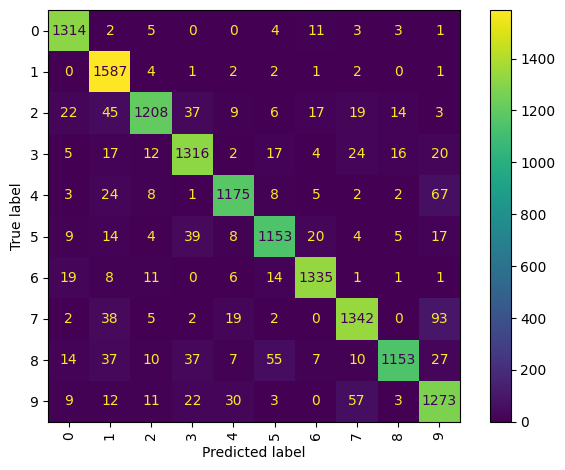

In [20]:
display_confusion_matrix(mnist, y_test, y_pred_knn, knn_clf, X_test)

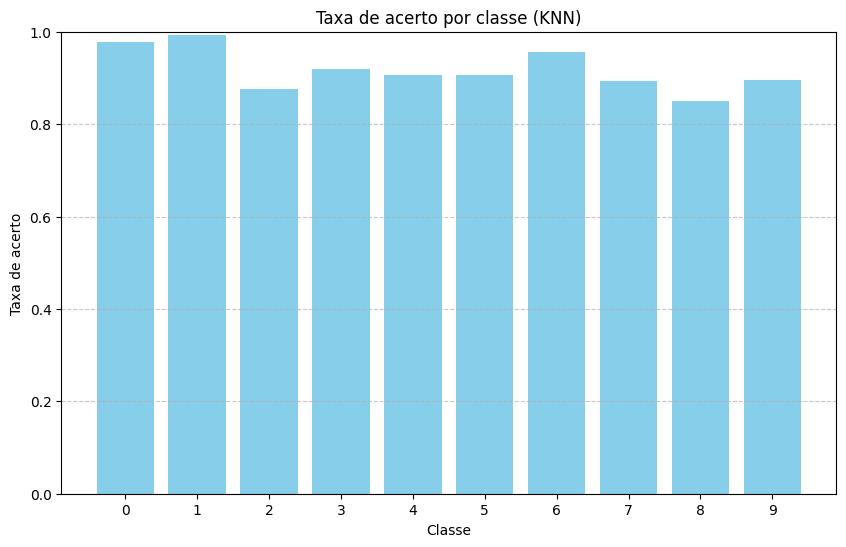

In [21]:
display_taxa_acerto_por_classe(y_test, y_pred_knn, title='Taxa de acerto por classe (KNN)')

### Decision Tree

In [22]:
# Treinamento do decision tree individual
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1343
           1       0.91      0.95      0.93      1600
           2       0.86      0.82      0.84      1380
           3       0.82      0.82      0.82      1433
           4       0.83      0.84      0.84      1295
           5       0.82      0.81      0.81      1273
           6       0.91      0.89      0.90      1396
           7       0.92      0.88      0.90      1503
           8       0.81      0.79      0.80      1357
           9       0.79      0.85      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



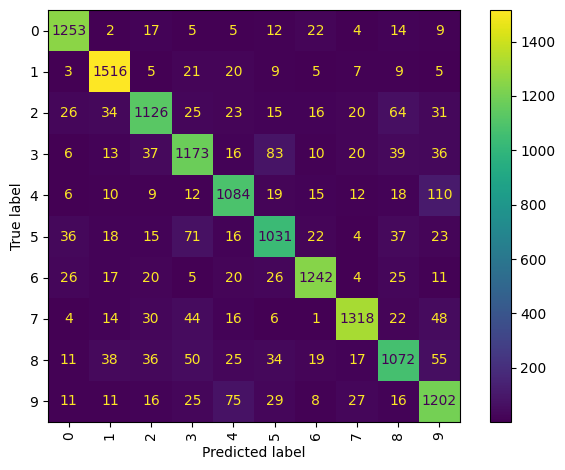

In [ ]:
display_confusion_matrix(mnist, y_test, y_pred_tree, tree_clf, X_test)

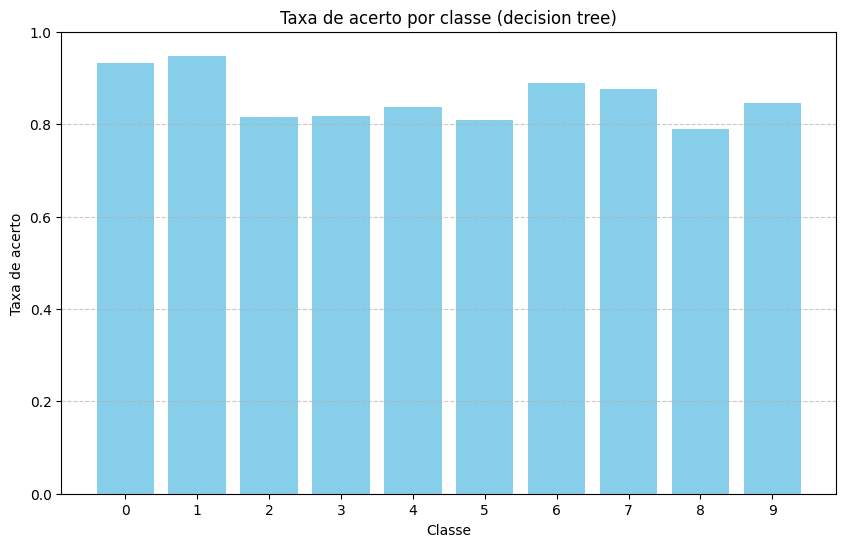

In [ ]:
display_taxa_acerto_por_classe(y_test, y_pred_tree, title='Taxa de acerto por classe (decision tree)')

### Ensemble (hard)

In [ ]:
# Treinamento do Ensemble
# Criação do Ensemble Classifier usando Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[('knn', knn_clf), ('tree', tree_clf)],
    voting='hard' # Pode ser 'soft' para pesos diferentes
)
# Treinamento do ensemble classifier
voting_clf_hard.fit(X_train, y_train)

# Avaliação do ensemble classifier
y_pred_hard = voting_clf_hard.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1343
           1       0.84      0.99      0.91      1600
           2       0.86      0.89      0.88      1380
           3       0.83      0.91      0.87      1433
           4       0.86      0.92      0.89      1295
           5       0.88      0.83      0.85      1273
           6       0.97      0.89      0.93      1396
           7       0.92      0.89      0.91      1503
           8       0.98      0.76      0.86      1357
           9       0.96      0.79      0.87      1420

    accuracy                           0.89     14000
   macro avg       0.90      0.89      0.89     14000
weighted avg       0.90      0.89      0.89     14000



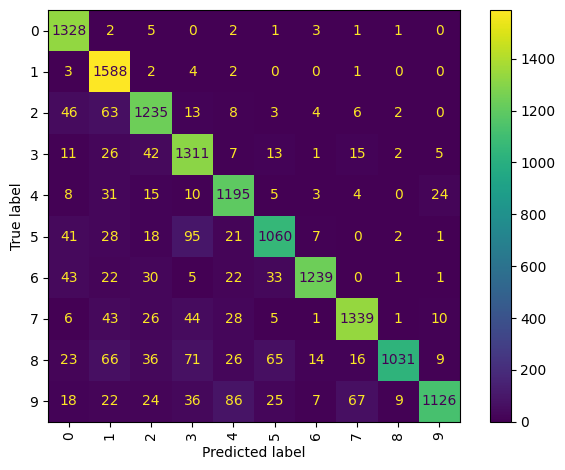

In [ ]:
display_confusion_matrix(mnist, y_test, y_pred_hard, voting_clf_hard, X_test)

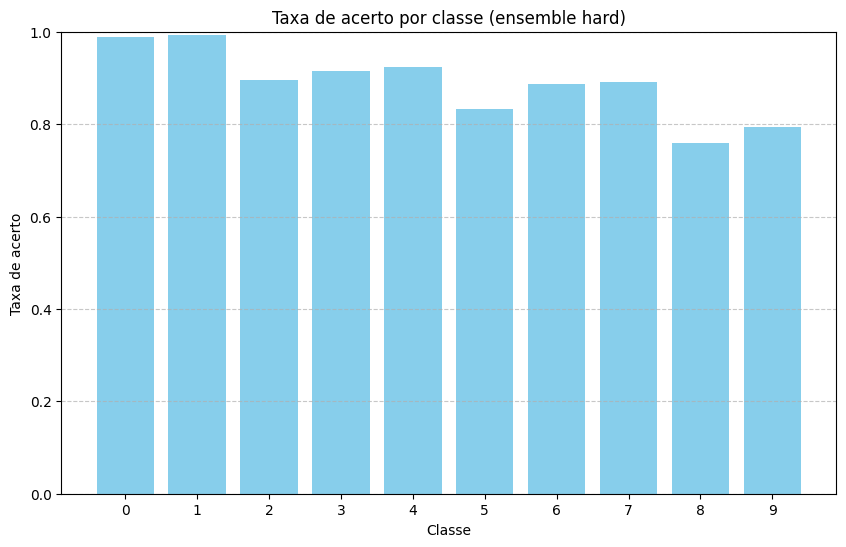

In [ ]:
display_taxa_acerto_por_classe(y_test, y_pred_hard, title='Taxa de acerto por classe (ensemble hard)')

### Ensemble (soft)

In [ ]:
# Treinamento do Ensemble
# Criação do Ensemble Classifier usando Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[('knn', knn_clf), ('tree', tree_clf)],
    voting='soft' # Pode ser 'soft' para pesos diferentes
)
# Treinamento do ensemble classifier
voting_clf_soft.fit(X_train, y_train)

# Avaliação do ensemble classifier
y_pred_soft = voting_clf_soft.predict(X_test)

accuracy_soft = accuracy_score(y_test, y_pred_soft)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1343
           1       0.92      0.99      0.95      1600
           2       0.92      0.89      0.91      1380
           3       0.91      0.89      0.90      1433
           4       0.91      0.91      0.91      1295
           5       0.90      0.89      0.90      1273
           6       0.94      0.94      0.94      1396
           7       0.94      0.93      0.94      1503
           8       0.91      0.84      0.88      1357
           9       0.88      0.90      0.89      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



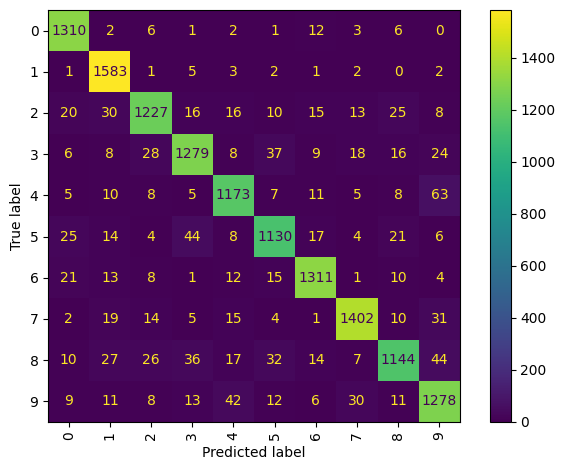

In [ ]:
display_confusion_matrix(mnist, y_test, y_pred_soft, voting_clf_soft, X_test)

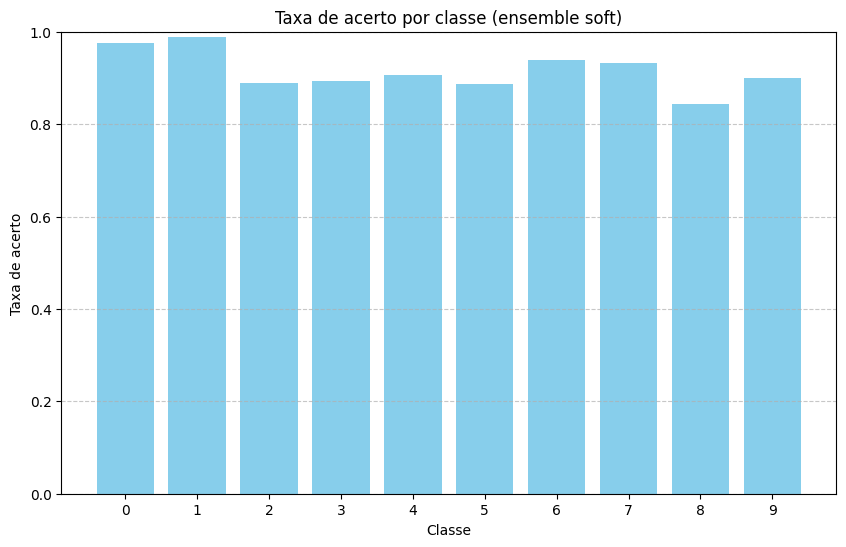

In [ ]:
display_taxa_acerto_por_classe(y_test, y_pred_soft, title='Taxa de acerto por classe (ensemble soft)')

## Comparando Modelos

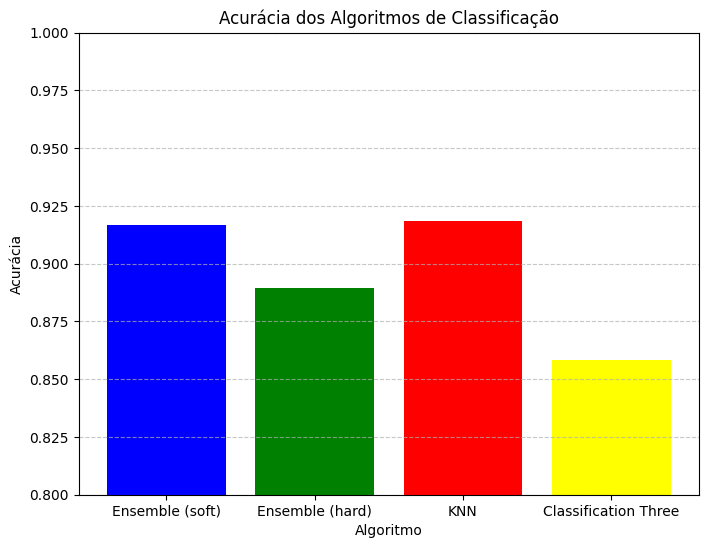

In [ ]:
# Valores das acurácias
acuracias = [accuracy_soft, accuracy_hard, accuracy_knn, accuracy_tree]
algoritmos = ['Ensemble (soft)', 'Ensemble (hard)', 'KNN', 'Classification Three']

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(algoritmos, acuracias, color=['blue', 'green', 'red', 'yellow'])
plt.title('Acurácia dos Algoritmos de Classificação')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

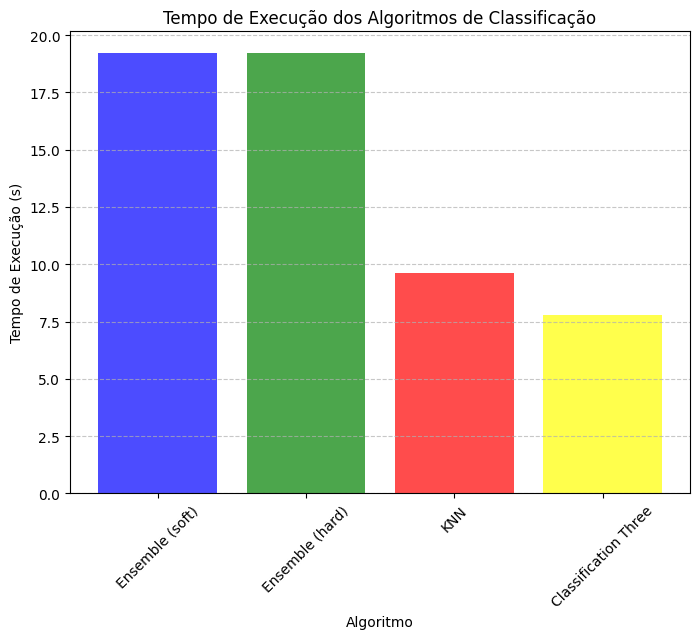

In [ ]:
import matplotlib.pyplot as plt

# Valores dos tempos de execução
tempos = [19.2, 19.2, 9.6, 7.8]
algoritmos = ['Ensemble (soft)', 'Ensemble (hard)', 'KNN', 'Classification Three']

# Cores correspondentes aos modelos
cores = ['blue', 'green', 'red', 'yellow']

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
for i in range(len(algoritmos)):
    plt.bar(algoritmos[i], tempos[i], color=cores[i], alpha=0.7)

plt.title('Tempo de Execução dos Algoritmos de Classificação')
plt.xlabel('Algoritmo')
plt.ylabel('Tempo de Execução (s)')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()